<Figure size 640x480 with 0 Axes>

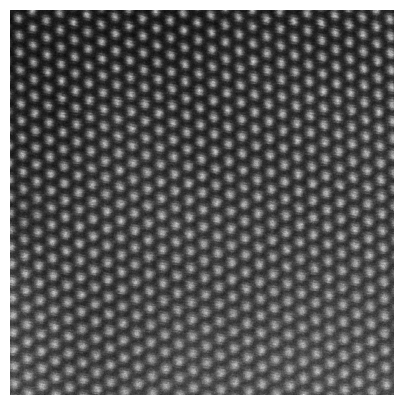

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/tem_image.txt", delimiter="\t", header = None, index_col=0)
pixel_plot = plt.figure()
plt.figure(figsize=(5,5))
plt.axis("off")
pixel_plot = plt.imshow(data, cmap='gray', origin = 'lower')
plt.savefig('pixel_plot.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

<Figure size 640x480 with 0 Axes>

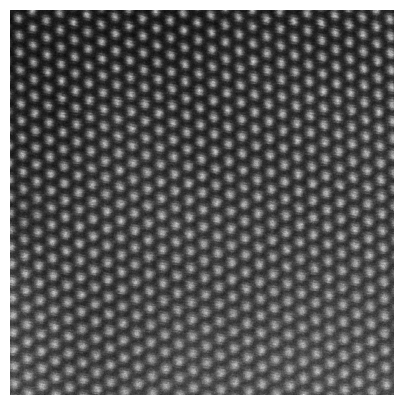

In [ ]:
pixel_plot = plt.figure()
plt.figure(figsize=(5,5))
plt.axis("off")
pixel_plot = plt.imshow(data, cmap='gray', origin = 'lower')
plt.savefig('pixel_plot.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
print("(rows, columns) : ",data.shape)

max = data.max().max()
print("maximum value of the pixel : ", max)

min = data.min().min()
print("minimum value of the pixel : ", min)

(rows, columns) :  (1024, 1024)
maximum value of the pixel :  135429.94140625
minimum value of the pixel :  9212.26055908203


In [ ]:
from skimage import io, filters, measure
image = io.imread('pixel_plot.png', as_gray=True)

thresh = filters.threshold_li(image)

labels = measure.label(image > thresh)
atoms = labels.max()
print("Total number of atoms: ", atoms)

Total number of atoms:  668


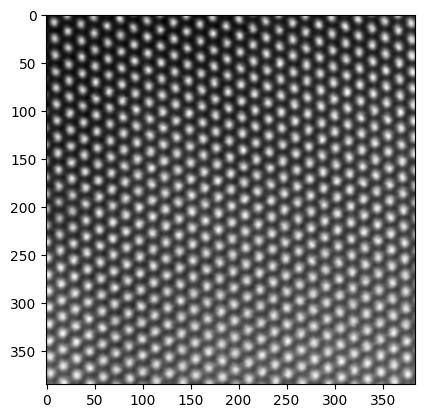

In [ ]:
from skimage.filters import gaussian

blurred_image = gaussian(image, sigma=1)
pixel_plot = plt.imshow(blurred_image, cmap='gray')
plt.show()

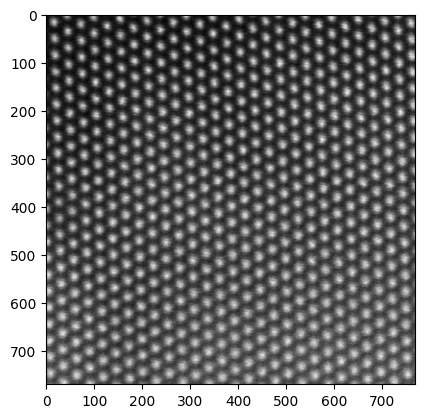

In [ ]:
from skimage import transform
height, width = image.shape[:2]

new_width = width * 2
new_height = height * 2
new_image = transform.resize(image, (new_height, new_width), order=0, preserve_range=True)
pixel_plot = plt.imshow(new_image, cmap='gray')
plt.show()

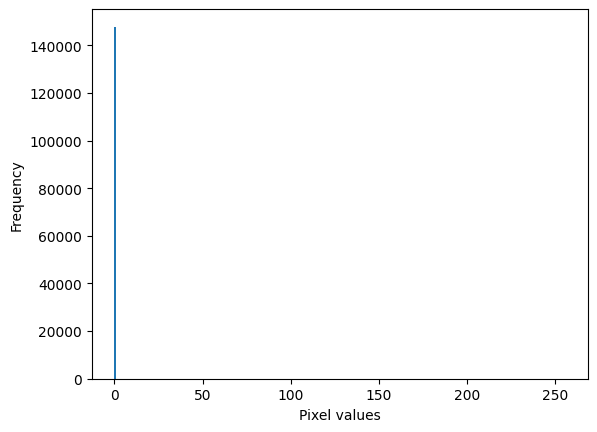

In [ ]:
#Histogram of the image intensities
import numpy as np
hist, bins = np.histogram(image.ravel(), bins=256, range=[0, 256])

plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import cv2
image = cv2.imread('/content/pixel_plot.png', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(image, (5, 5), 0)
_, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour = None
max_area = 0

for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour = contour

perimeter = cv2.arcLength(largest_contour, True)
area = cv2.contourArea(largest_contour)

circularity = (4 * np.pi * area) / (perimeter ** 2)

if circularity > 0.9:
    dimensionality = 0
elif circularity > 0.6:
    dimensionality = 1
else:
    dimensionality = 2

print("Dimensionality of the atom:", dimensionality)

Dimensionality of the atom: 1
